### Цель: на основе данных из таблицы:
#### 1. Таблица с данными по пользователям 
#### Нужно определить:
* Какая модель показала себя лучше на основании метрик.
2. Какое количество кластеров можно выделить.
3. Оценить метрики accuracy, precision и recall.
4. Какие кластеры склонны к оттоку.

### [1.Исследование данных и предообработка данных](#1.-Исследование-данных-и-предообработка-данных)
    1. Исследование данных
    2. Изучение данных с помощью методов

### [2.Модель прогнозирования оттока клиентов](#2.-Модель-прогнозирования-оттока-клиентов)
    1. Обучение моделей на train-выборке 
    2. Оценка метрик

### [3.Кластеризация клиентов](#3.-Кластеризация-клиентов)
    1. Матрица расстояний
    2. Обучение модели кластеризации 

### [4.Общий вывод](#4.-Общий-вывод)

### 1. Исследование данных и предообработка данных

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Импортируем нужные библиотеки для проекта

In [1]:
# Открытие данных с помощью read_csv(),
# выводится информация по столбцам методом info(), также проверяем методом duplicated() наличие дубликатов

#### Таблица имеет следующий вид столбцов:
* gender — пол;
* Near_Location — проживание или работа в районе, где находится фитнес-центр;
* Partner — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* Phone — наличие контактного телефона;
* Age — возраст;
* Lifetime — время с момента первого обращения в фитнес-центр (в месяцах).
* Contract_period — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
* Month_to_end_contract — срок до окончания текущего действующего абонемента (в месяцах);
* Group_visits — факт посещения групповых занятий;
* Avg_class_frequency_total — средняя частота посещений в неделю за все время с начала действия абонемента;
* Avg_class_frequency_current_month — средняя частота посещений в неделю за предыдущий месяц;
* Avg_additional_charges_total — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

#### Пропусков и дубликатов не найдено, типы данных в порядке

In [ ]:
df.describe().T
# Методом describe() статистически описывается каждый столбец(предиктор)

In [ ]:
# С помощью метода groupby() и срез метода loc() создаем сроки с фактом "оттока" и фактом "не оттока" пользователей,
# и считаем средние значения по предикторам

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59397a0f50>,
      dtype=object)

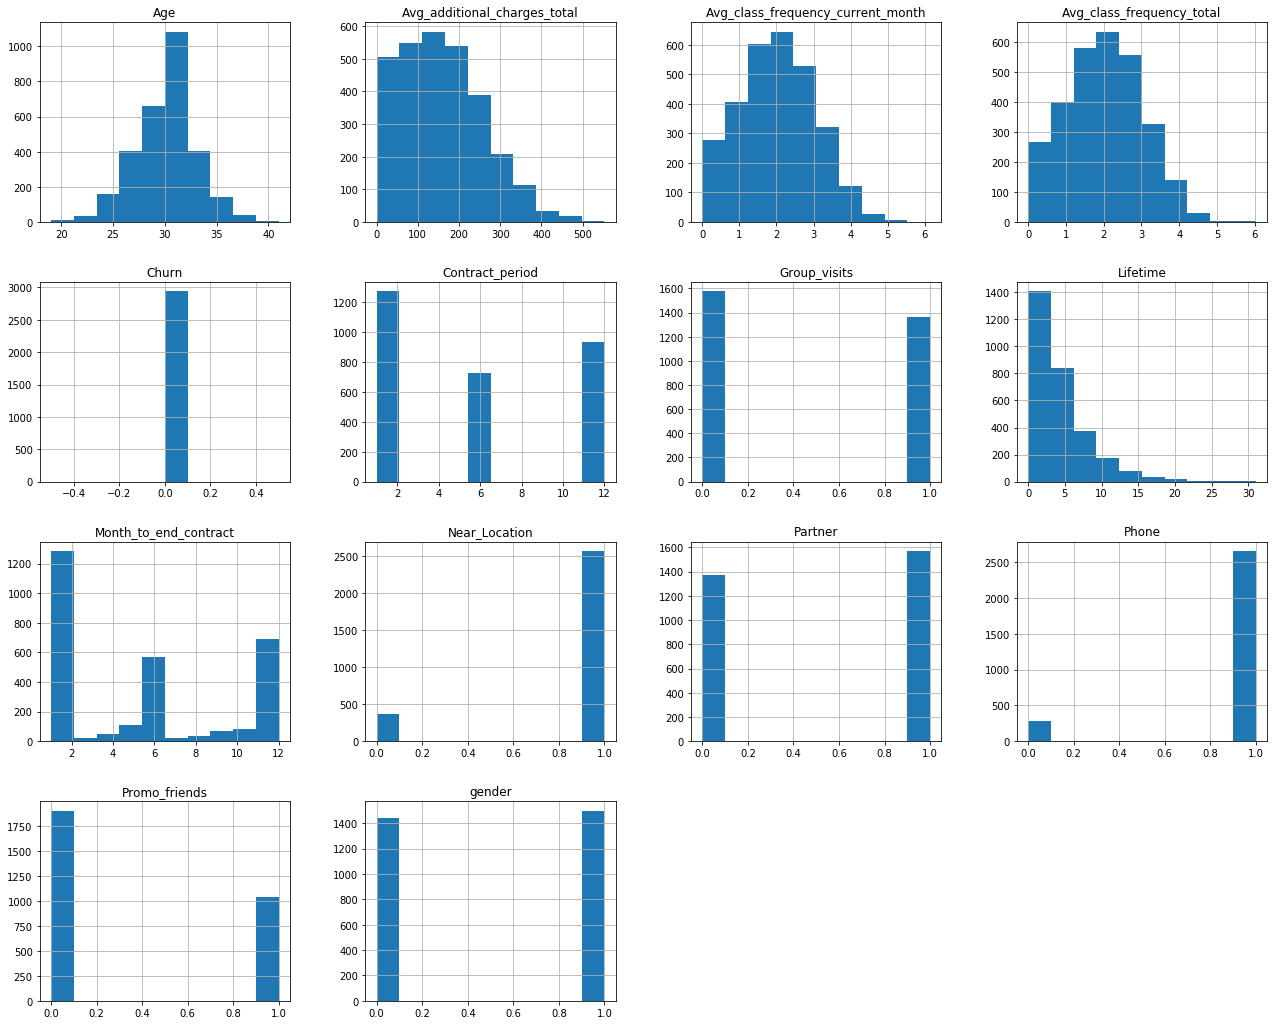

In [5]:
# Отображается гистограммы распределений по каждому предиктору в таблице для "не оттока" пользователей

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5930186f50>,
      dtype=object)

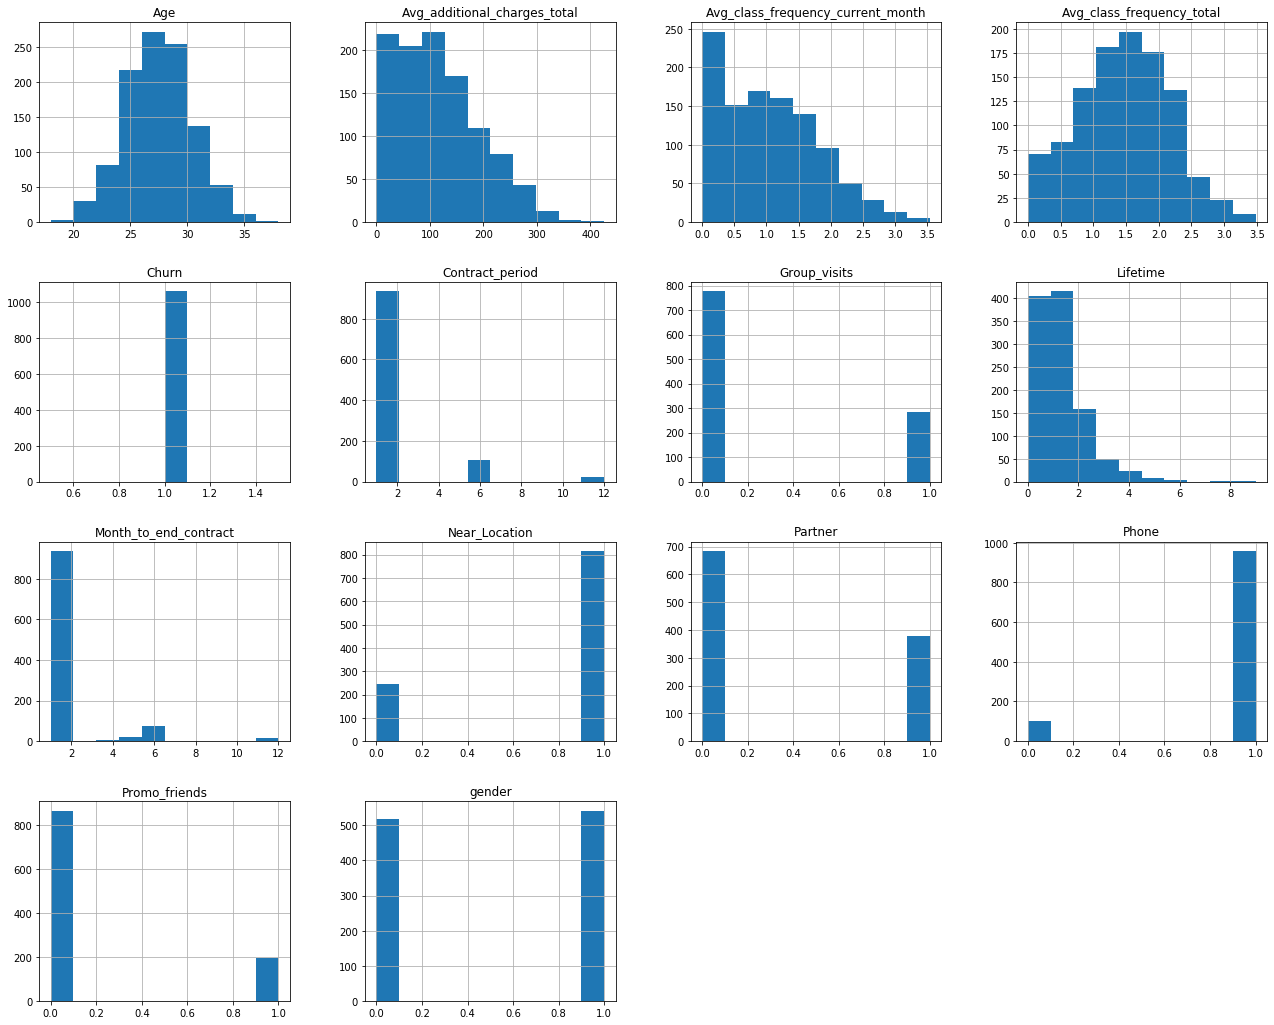

In [6]:
# Отображается гистограммы распределений по каждому предиктору в таблице для "оттока" пользователей

####  По данным факт оттока наблюдается у людей младшего возраста 26 лет, против не оттока 30 лет, также выручка больше у людей старшего возраста 158 против младшего 115, средняя частота посещения на всю когорту также больше 2.02 против 1.47, период на который берут абонемент также больше 5.74 против 1.72, время жизни после посещения также больше 4.71 против 1, мужчин и женщин примерно равное количество, также это подтверждается на графиках

### 2. Модель прогнозирования оттока клиентов

In [ ]:
# Отображаем матрицу корреляций методом corr() для поиска сильных взаимосвязей (мультиколлинеарности)

#### Имеется сильная зависимость между контатным периодом и периодом до окончания абонемента, также между частотой посещения в неделю на весь срок и частотой посещения в неделю за последний месяц

In [8]:
# Выделяем целевую переменную по оттоку и отдельно остальные предикторы,
# далее делим эти параметры на валидационную и тестовую выборки для обучения модели

#### В таблице признаков помимо столбца в оттоком, удалили частотой посещения в неделю за последний месяц,  срок до окончания текущего абонемента, для того чтобы зависимость не искажало показатели метрик

In [9]:
# Созаем функцию под модели прогнозирования, также используются две модели прогрозирования RandomForestClassifier и LogisticRegression, 
# с помощью функции определяем наилучшую модель по метрикам Recall, Accuracy, f1,Precision

In [1]:
# Вызываем функцию с входным параметром RandomForestClassifier

In [3]:
# Вызываем функцию с входным параметром LogisticRegression

#### Лучше всего показал себя алгоритм модели случайный лес (RandomForestClassifier), по метрикам Accuracy и Precision, Recall, f1

### 3. Кластеризация клиентов

In [12]:
# Для кастеризации клиентов стандартизируем предикторы, чтобы распределение было нормальным, для решения задачи

In [2]:
# Строим дендограмму для определения оптимального количества кластеров

#### При обучении модели кластеризации, модель показала оптимальное количество кластеров 4

In [14]:
# Обучаем модель методом fit_predict и кластеры соединяем с таблицей предикторов 

In [ ]:
# Считаем среднее по предикторам, по каждому кластеру

cluster
0    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
1    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
2    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
3    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
dtype: object

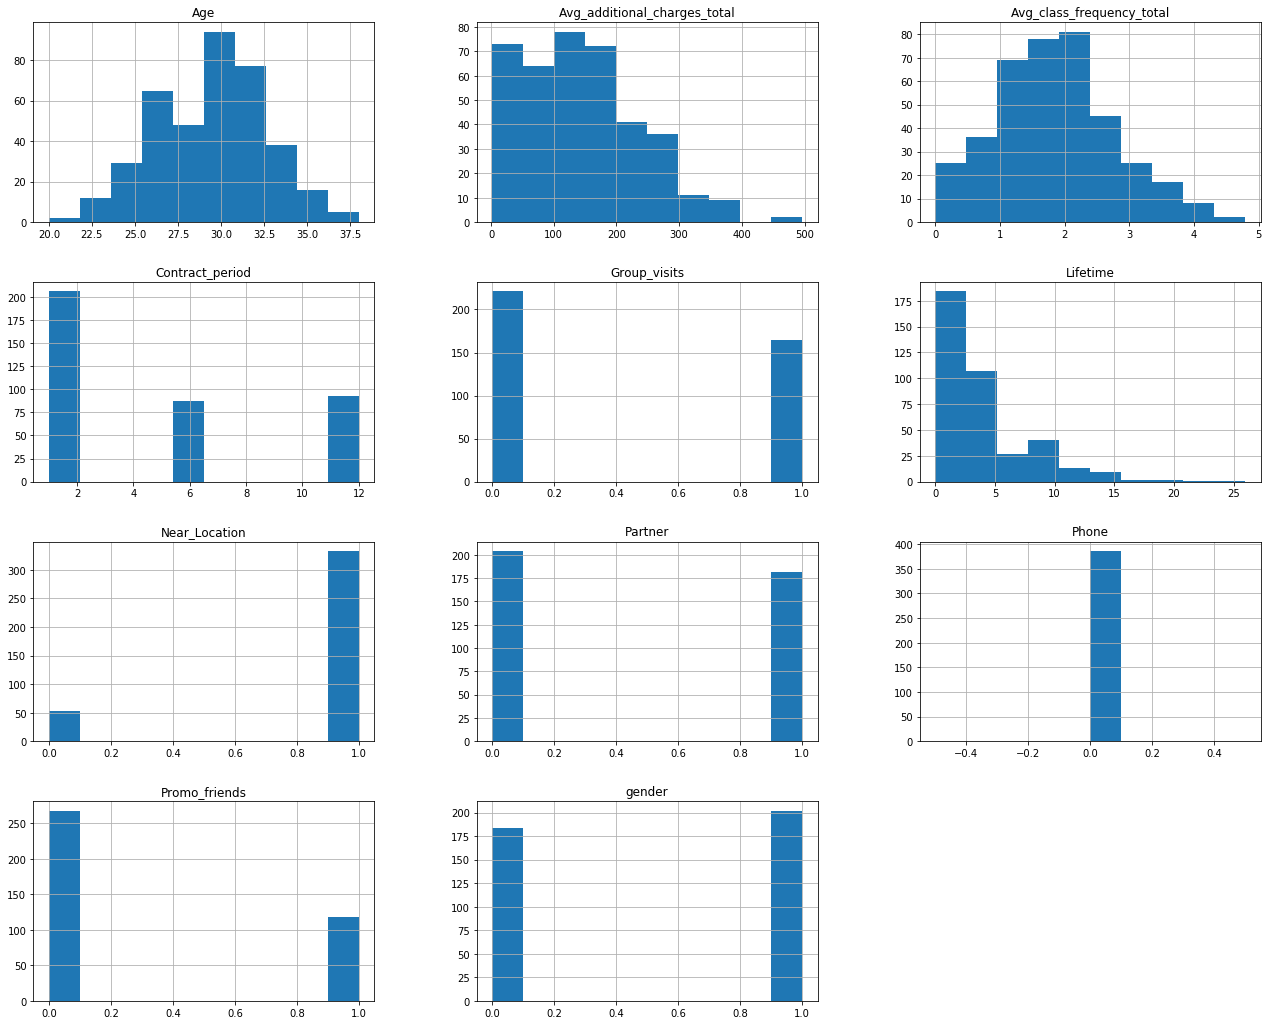

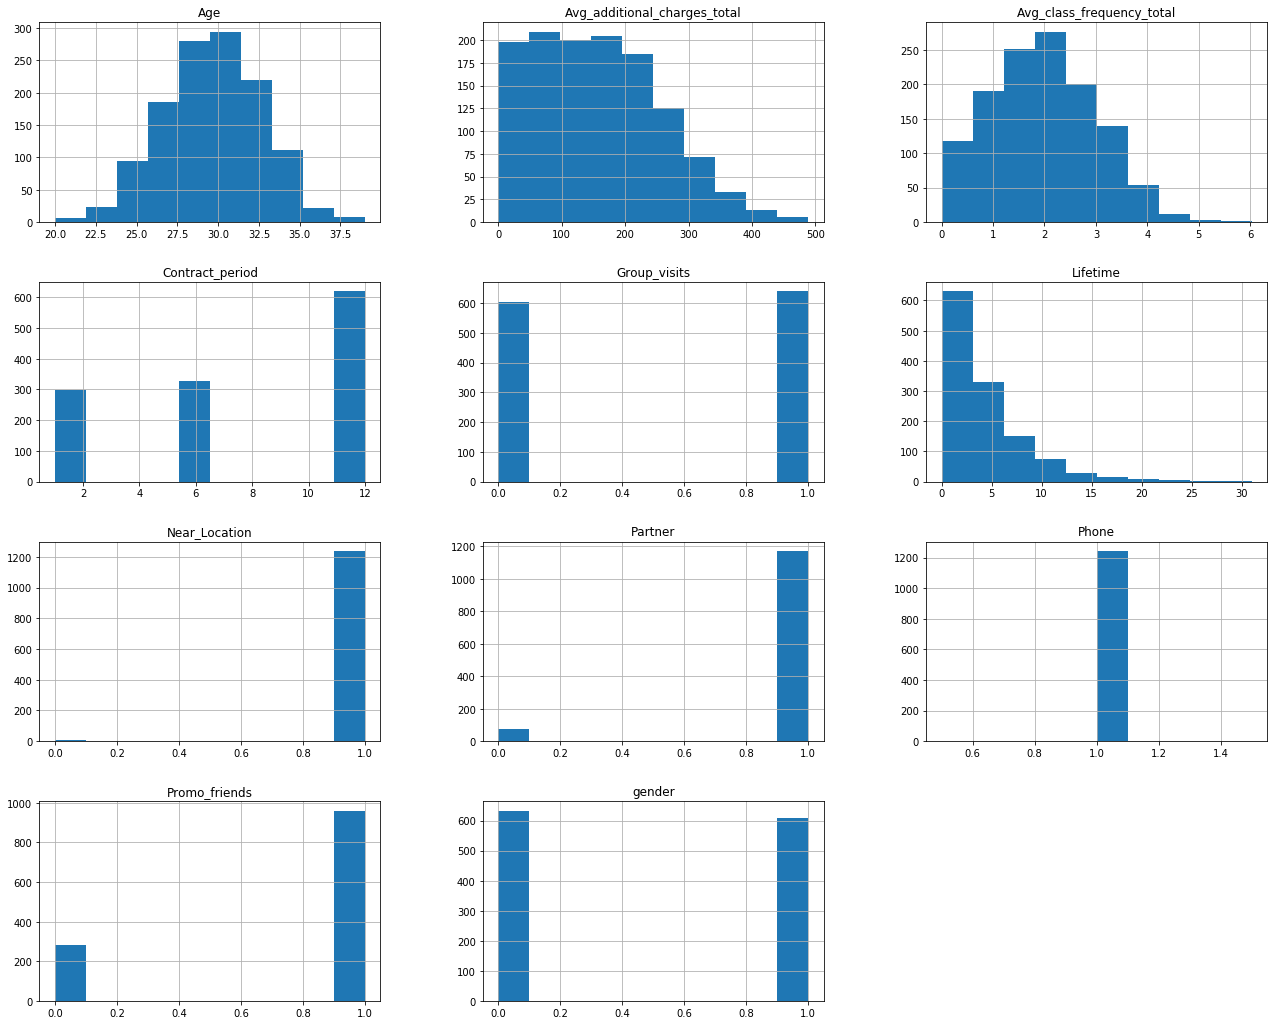

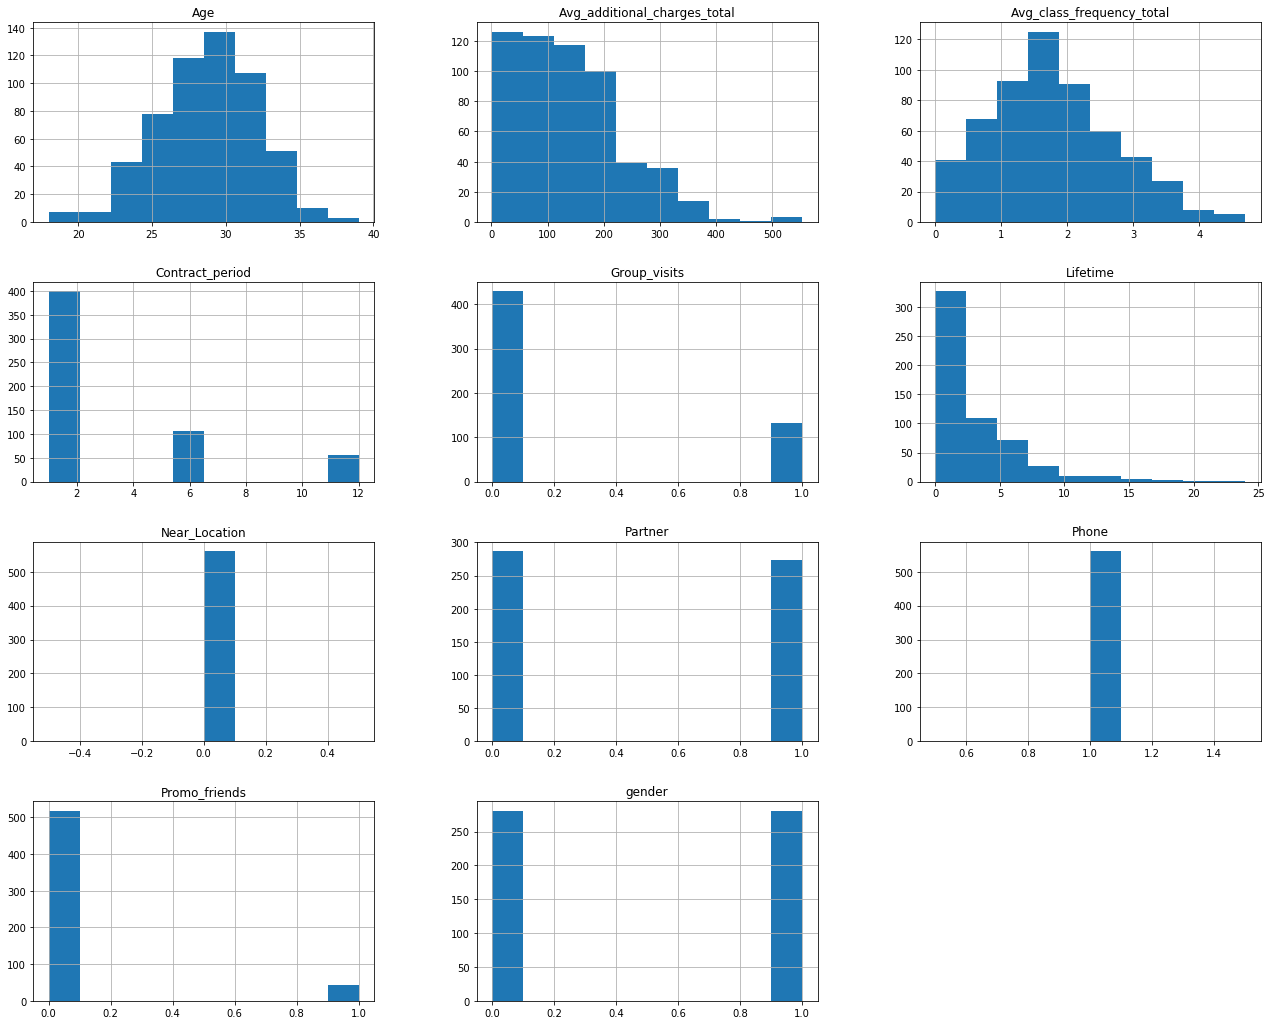

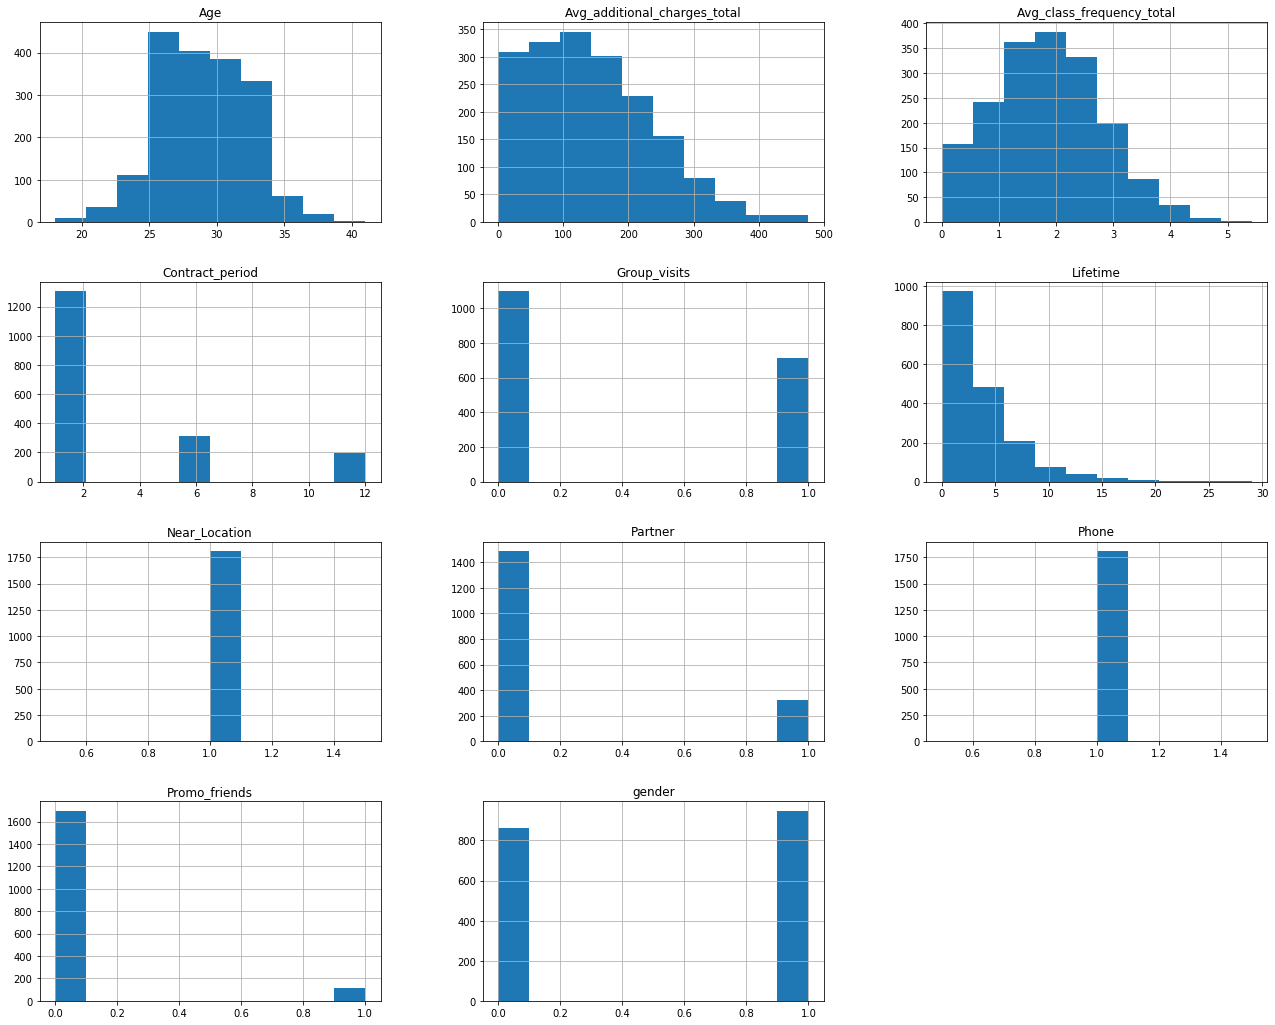

In [16]:
# По каждому кластеру строим гистограмму по предикторам

#### Во 2 кластере контактный период больше других и сильно отличается также в этой группе выручка выше, также локация ближе всех для пользователей к фитнес центру

In [ ]:
# Соединяем обратно столбец оттока и считаем по кластерам отток

#### Самый большой отток наблюдается в 3 кластере 0.4, дальше 2 кластер 0.33, 4 кластер 0.26, 1 кластер 0.1

### 4. Общий вывод

#### По данным факт оттока наблюдается у людей младшего возраста 26 лет, против не оттока 30 лет, также выручка больше у людей старшего возраста 158 против младшего 115, средняя частота посещения на всю когорту также больше 2.02 против 1.47, период на который берут абонемент также больше 5.74 против 1.72, время жизни после посещения также больше 4.71 против 1, мужчин и женщин примерно равное количество, также это подтверждается на графиках
#### Имеется сильная зависимость между контатным периодом и периодом до окончания абонемента, также между частотой посещения в неделю на весь срок и частотой посещения в неделю за последний месяц
#### В таблице признаков помимо столбца в оттоком, удалили частотой посещения в неделю за последний месяц, срок до окончания текущего абонемента, для того чтобы зависимость не искажало показатели метрик, Лучше всего показал себя алгоритм модели случайный лес, по метрикам Accuracy и Precision
#### Во 2 кластере контактный период больше других и сильно отличается также в этой группе выручка выше, также локация ближе всех для пользователей к фитнес центру,  Самый большой отток наблюдается в 3 кластере 0.4, дальше 2 кластер 0.33, 4 кластер 0.26, 1 кластер 0.1
#### Общие рекомендации: наименьший отток у людей от 29 лет, которые живут рядом, также кто состоит в партнерской компании, кто учавствует в промо акциях по рекомендации действующих пользователей, возможно можно предложить скидки для молодых пользователей на абонементы с большим периодом